# Goodreads: EDA

I'll be visually displaying the data as the following, to see if there are any obvious trends or patterns or interesting information:

* [1. Genre Breakdown](#genre)
   * [1.1 Top 15 Genres](#top15g)
   * [1.2 Top Rated Genres](#g_rated)
* [2. Top 10 most rated books](#top10)
* [3. Ratings Distribution](#ratedist)
* [4. Book Pages](#pages)
* [5. Author Breakdown](#auth)
   * [5.1 Best Rated Authors](#authrated)
   * [5.2 The more, the merrier?](#authmost)

In [34]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#Load dataset
genres = pd.read_csv('data/genres.csv', index_col=0)

In [36]:
#Change all display settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [37]:
genres.head()

,authors,desc,edition,format,pages,rating,rating_count,review_count,title,missing_ed,missing_desc,length,quality,Fiction,Fantasy,Romance,Young Adult,Nonfiction,Historical,Historical Fiction,Contemporary,Classics,Mystery,Cultural,Paranormal,Science Fiction,Childrens,Literature,Other
0,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,0,Paperback,870.0,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,0.0,1.0,3.0,1.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Douglas Adams,Seconds before the Earth is demolished to make...,0,Paperback,193.0,4.21,1155911,23919,The Hitchhiker's Guide to the Galaxy,1.0,1.0,1.0,1.0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2,Shel Silverstein,"""Once there was a tree...and she loved a littl...",0,Hardcover,64.0,4.37,789681,15694,The Giving Tree,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
3,Dan Brown,An ingenious code hidden in the works of Leona...,0,Paperback,481.0,3.81,1668594,43699,The Da Vinci Code,1.0,1.0,3.0,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,Lewis Carroll|John Tenniel|Martin Gardner,""" I can't explain myself, I'm afraid, sir,"" sa...",0,Paperback,239.0,4.07,411153,9166,Alice's Adventures in Wonderland & Through the...,1.0,1.0,2.0,1.0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0


## Genre Breakdown <a name='genre'></a>

First, I'd like to do a breakdown of the genres in the books dataset.

In [38]:
#List of genres
g_list = genres.columns[13:].to_list()

### Top 15 Genres <a name='top15g'></a>

Fiction is the dominating book genre, with 54% of all books listed being fiction. I was expecting a higher number, but maybe that's just because I tend to read more fiction. It does lead by a large margin; it's almost double the amount of the second leading genre.

It's followed by Fantasy, Romance, Young Adult, and Nonfiction.

In [39]:
#Top 15 genres
top_g = genres[g_list[:-1]].sum().sort_values(ascending=False)

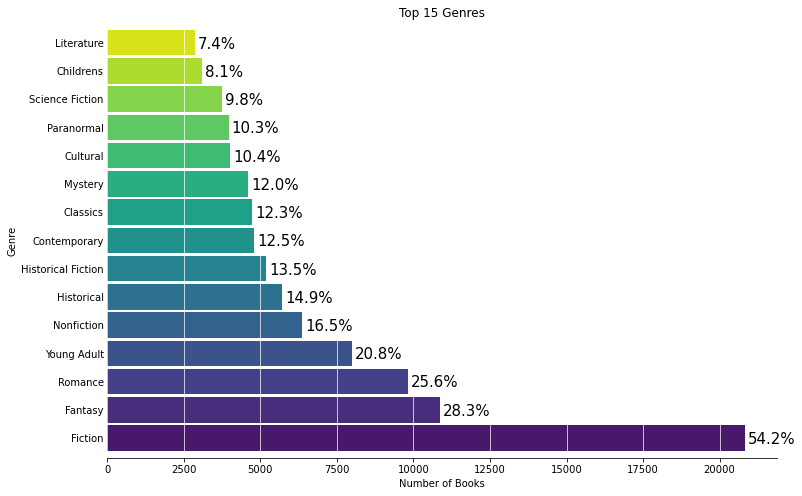

In [40]:
#Plot the top 15 genres
plt.subplots(figsize=(12, 8))

ax = top_g.sort_values(ascending=False).plot.barh(width=0.9, color=sns.color_palette('viridis', 15))
ax.set_xlabel('Number of Books')
ax.set_ylabel('Genre')
ax.set_title('Top 15 Genres')

#Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

#Add indicator for ratings
ax.yaxis.set_tick_params(length=0)
plt.vlines(x=np.arange(0, 22500, 2500), ymin=-1, ymax=17, linewidth=0.7, color='white')

#Show percentage of books that's in the genre
for p in ax.patches:
    ax.text(p.get_width()+100, p.get_y()+0.25, 
            str(round(p.get_width()/len(genres)*100, 1))+'%',
           fontsize=15)
    
plt.show()

In [41]:
other = genres['Other'].sum()

print("Majority of the books ({:.2f}%) are included in other genres not within the top 15 genres, meaning they're in the top 15 genre and another non-top15 genre.\nOnly {} ({:.2f}%) books are solely in the top 15 genres.".format((other / len(genres)*100), len(genres)-other, (len(genres)-other)/len(genres)*100))

Majority of the books (91.63%) are included in other genres not within the top 15 genres, meaning they're in the top 15 genre and another non-top15 genre.
Only 3215 (8.37%) books are solely in the top 15 genres.


### Average Genre Ratings <a name='g_rated'></a>

Of these top 15 genres, I'm curious to know which one performs the best or has the best average rating.

In [42]:
top_g.index

Index(['Fiction', 'Fantasy', 'Romance', 'Young Adult', 'Nonfiction',
       'Historical', 'Historical Fiction', 'Contemporary', 'Classics',
       'Mystery', 'Cultural', 'Paranormal', 'Science Fiction', 'Childrens',
       'Literature'],
      dtype='object')

In [43]:
top_g

Fiction               20830
Fantasy               10871
Romance                9816
Young Adult            7986
Nonfiction             6357
Historical             5718
Historical Fiction     5185
Contemporary           4789
Classics               4724
Mystery                4601
Cultural               4009
Paranormal             3961
Science Fiction        3760
Childrens              3102
Literature             2852
dtype: int64

In [44]:
#Create a dataframe with all the genres' average ratings
g_rating = pd.DataFrame(columns=['genre','avg_rating'])

for i in range(15):
    g_rating.loc[i, 'avg_rating'] = genres[genres.iloc[:,(11+i)]==1].rating.mean()
    g_rating.loc[i, 'genre'] = top_g.index[i]

In [45]:
g_rating.sort_values(by='avg_rating', ascending=False)

,genre,avg_rating
6,Historical Fiction,4.05872
3,Young Adult,4.01752
1,Fantasy,4.00605
10,Cultural,3.99731
13,Childrens,3.99038
4,Nonfiction,3.98583
0,Fiction,3.97937
7,Contemporary,3.97332
8,Classics,3.97275
5,Historical,3.95737


Within the top 15 genres, it looks like Historical Fiction does really well, followed by Young Adult.

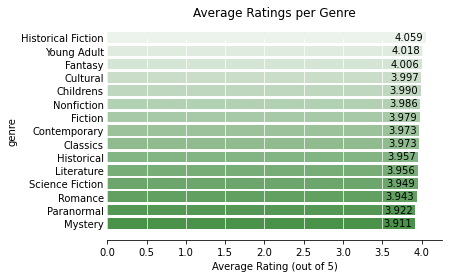

In [46]:
#Plot all the average ratings per genre
ax = sns.barplot(x='avg_rating', y='genre', data=g_rating.sort_values(by='avg_rating', ascending=False), palette=sns.color_palette('light:g', 20))

#Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

#Add indicator for ratings
ax.yaxis.set_tick_params(length=0)
plt.vlines(x=np.arange(0, 4.1, 0.5), ymin=0, ymax=14.5, linewidth=0.7, color='white')

#Show the average rating of each genre
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_width()), (p.get_width()-0.4, p.get_y()+0.6))

plt.title("Average Ratings per Genre")
plt.xlabel("Average Rating (out of 5)")
plt.show()

## Top 10 Best Rated Books <a name='top10'></a>

Going into more specifics, what are the top 10 best rated books in the dataset? And would this match with the top rated genres and/or top genres?

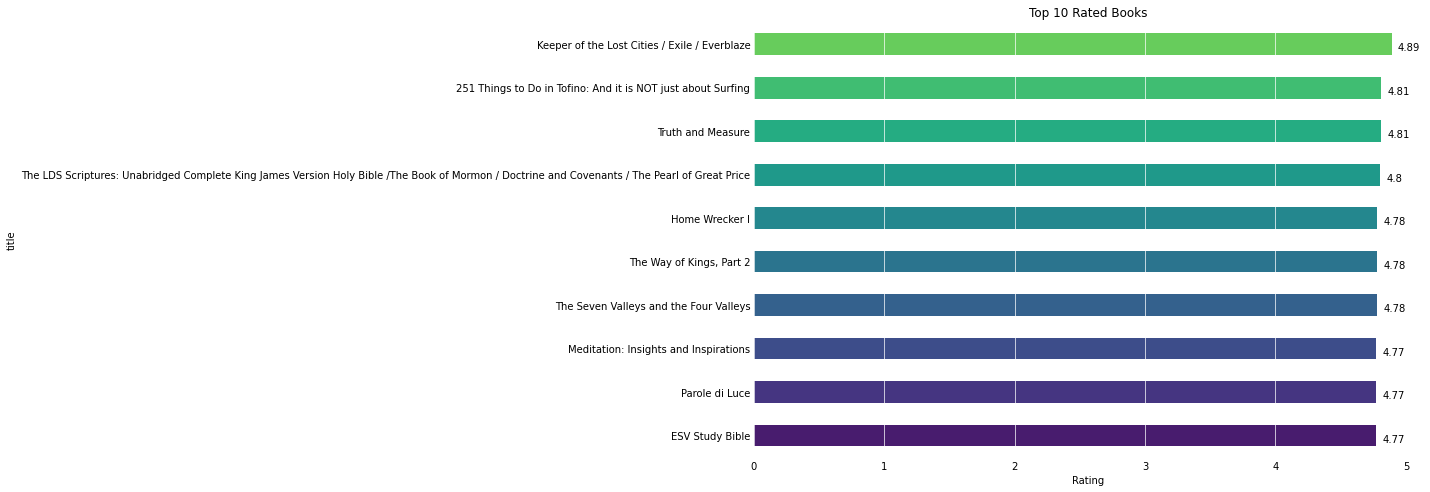

In [47]:
best10 = genres[genres.quality==1].sort_values('rating', ascending=False).head(10).set_index('title')

plt.subplots(figsize=(12, 8))
ax = best10.rating.sort_values().plot.barh(color=sns.color_palette('viridis', 12))

#Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Add indicator for ratings
ax.tick_params(length=0)
plt.vlines(x=np.arange(0, 5, 1), ymin=-1, ymax=10, linewidth=0.7, color='white')

#Add ratings on graph
for p in ax.patches:
    ax.annotate('{}'.format(p.get_width()), (p.get_width()+0.05, p.get_y()+0.1))

plt.title('Top 10 Rated Books')
plt.xlabel('Rating')
plt.show()

It looks like religious texts are quite popular and well liked. However, upon a closer look, 6/10 of the top 10 rated books fall below the 25th percentile in review counts. This lower than average review count could contribute to the high ratings. After all, if only a few people are reviewing, it's not an accurate view of the general opinion of the book. Possibly a niche book would only be read by people who are already highly interested in it. So let's take a look at the top 10 rated books, if its review count is greater than the 25th percentile (more than 1,143 ratings).

In [48]:
genres.rating_count.describe()

count    3.841600e+04
mean     3.466084e+04
std      1.760683e+05
min      1.000000e+02
25%      1.143000e+03
50%      4.159000e+03
75%      1.432150e+04
max      5.588580e+06
Name: rating_count, dtype: float64

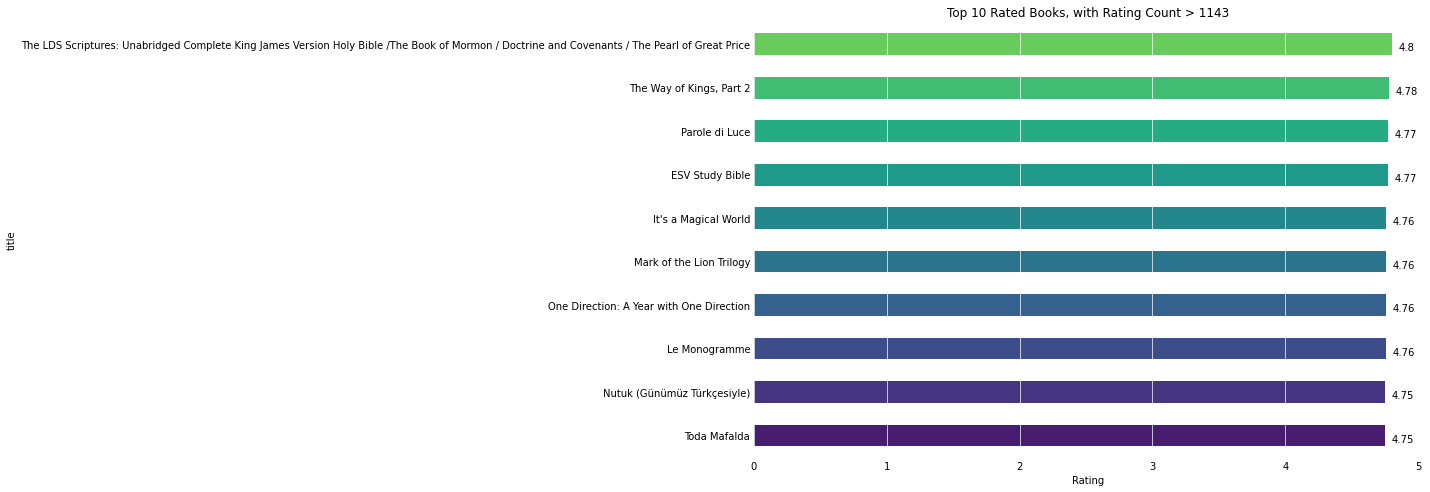

In [49]:
best10_rcount = genres[(genres.quality==1) & (genres.rating_count > 1143)].sort_values('rating', ascending=False).head(10).set_index('title')

plt.subplots(figsize=(12, 8))
ax = best10_rcount.rating.sort_values().plot.barh(color=sns.color_palette('viridis', 12))

#Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Add indicator for ratings
ax.tick_params(length=0)
plt.vlines(x=np.arange(0, 5, 1), ymin=-1, ymax=10, linewidth=0.7, color='white')

#Add ratings on graph
for p in ax.patches:
    ax.annotate('{}'.format(p.get_width()), (p.get_width()+0.05, p.get_y()+0.1))

plt.title('Top 10 Rated Books, with Rating Count > 1143')
plt.xlabel('Rating')
plt.show()

The bible still stays strong as a top rated book, as expected from a book related to one of the world's largest religions.

In [50]:
best10_rcount

,authors,desc,edition,format,pages,rating,rating_count,review_count,missing_ed,missing_desc,length,quality,Fiction,Fantasy,Romance,Young Adult,Nonfiction,Historical,Historical Fiction,Contemporary,Classics,Mystery,Cultural,Paranormal,Science Fiction,Childrens,Literature,Other
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,
The LDS Scriptures: Unabridged Complete King James Version Holy Bible /The Book of Mormon / Doctrine and Covenants / The Pearl of Great Price,The Church of Jesus Christ of Latter-day Saint...,OVERVIEW:The NOOK edition of the LDS Complete ...,0,Digital,0.0,4.80,1227,27,0.0,1.0,0.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
"The Way of Kings, Part 2",Brandon Sanderson,According to mythology mankind used to live in...,0,Paperback,530.0,4.78,9356,375,1.0,1.0,3.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
ESV Study Bible,Anonymous|Lane T. Dennis|Wayne A. Grudem,The ESV Study Bible was designed to help you u...,0,Hardcover,2750.0,4.77,11280,281,1.0,1.0,3.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Parole di Luce,Brandon Sanderson|Gabriele Giorgi,La guerra con i Parshendi è giunta a una nuova...,0,Hardcover,1207.0,4.77,141212,9043,1.0,1.0,3.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Le Monogramme,Odysseus Elytis,Elytis (Prix Nobel de Littérature 1979) tenait...,0,Paperback,40.0,4.76,1372,57,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
One Direction: A Year with One Direction,One Direction|Niall Horan|Louis Tomlinson|Liam...,One Direction are the biggest band on the plan...,0,Digital,64.0,4.76,2028,38,1.0,1.0,1.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Mark of the Lion Trilogy,Francine Rivers,No highlights or markings on pages. In good co...,0,Paperback,1468.0,4.76,10300,758,1.0,1.0,3.0,1.0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1
It's a Magical World,Bill Watterson,When cartoonist Bill Watterson announced that ...,0,Paperback,176.0,4.76,24380,317,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Toda Mafalda,Quino,Este libro contiene de la primera a la última ...,0,Hardcover,660.0,4.75,6789,219,1.0,1.0,3.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


It looks like the top 10 best rated books with a number of ratings are roughly split between fiction and nonfiction, and almost all of them are also in a non-top15 genre. Additionally, only one of the top 10 books are in the genre of Historical Fiction, the highest average rated genre. It's interesting to see that there's one more book in fiction than non-fiction, when on average, non-fiction books rate higher; but since this is only looking at the top 10 books in a dataset of thousands, it's not too significant to draw conclusions.

Additionally, the top 10 best rated books don't include any of the following genres: literature, childrens (genre with the 2nd highest ratings on average), science fiction, paranormal, mystery, contemporary, young adult.

In [51]:
best10_rcount.sum(axis=0)[12:].sort_values(ascending=False)

Other                 9
Fiction               4
Nonfiction            3
Fantasy               2
Cultural              1
Classics              1
Historical Fiction    1
Historical            1
Romance               1
Literature            0
Childrens             0
Science Fiction       0
Paranormal            0
Mystery               0
Contemporary          0
Young Adult           0
dtype: object

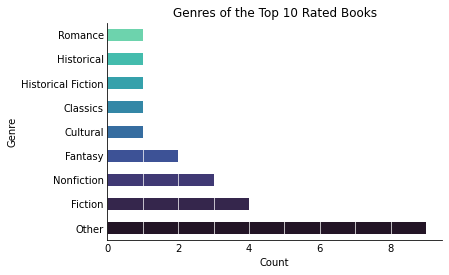

In [52]:
best10g = best10_rcount.sum(axis=0)[12:].sort_values(ascending=False)

ax = best10g[best10g>0].plot.barh(color=sns.color_palette('mako', 10))

#Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Add indicator for ratings
ax.tick_params(length=0)
plt.vlines(x=np.arange(0, 10, 1), ymin=-5, ymax=18, linewidth=0.7, color='white')

plt.ylabel("Genre")
plt.xlabel("Count")
plt.title("Genres of the Top 10 Rated Books")
plt.show()

## Rating Distribution <a name='ratedist'></a>

Given that the total rating count is in the thousands, I would expect the distribution to be similar to a normal distribution. To be sure, it can be graphed.

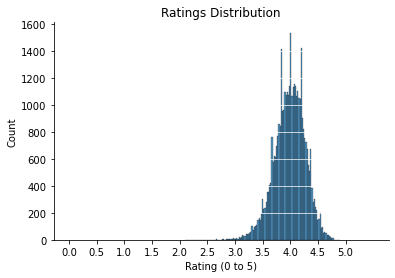

In [53]:
#Plot histogram/distribution for ratings
ax = sns.histplot(x='rating', data=genres)

#Add indicators for y-values
plt.hlines(y=np.arange(0,1600,200), xmin=0, xmax=5.5, colors='white', linewidth=0.7)

#Get right rid of the frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(np.arange(0,5.5,0.5))
plt.title('Ratings Distribution')
plt.xlabel('Rating (0 to 5)')
plt.ylabel('Count')
plt.show()

Since it's a big hard to tell whether are long tails on either side due to the large y-values, a boxplot of the ratings distribution can be visualized.

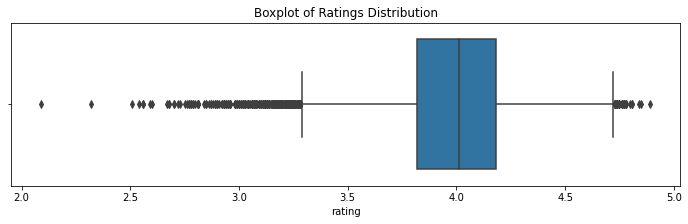

In [54]:
plt.figure(figsize=(12,3))
sns.boxplot(x='rating', data=genres, orient='h')
plt.title('Boxplot of Ratings Distribution')
plt.show()

There's numerous outliers in the ratings, with the distribution skewed left.

## Book Pages <a name='pages'></a>

The book page length distribution, on the other hand, can be expected to be skewed right.

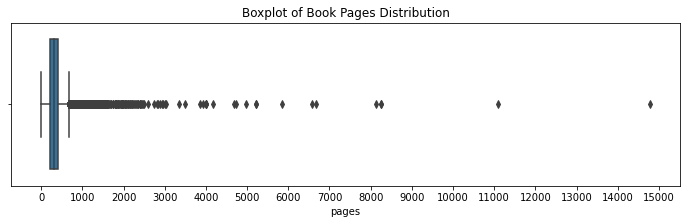

In [55]:
plt.figure(figsize=(12,3))
sns.boxplot(x='pages', data=genres, orient='h')
plt.xticks(np.arange(0,16000,1000))
plt.title('Boxplot of Book Pages Distribution')
plt.show()

The boxplot is squashed because of so many outliers; to take a better look, a histogram will be built on a log scale.

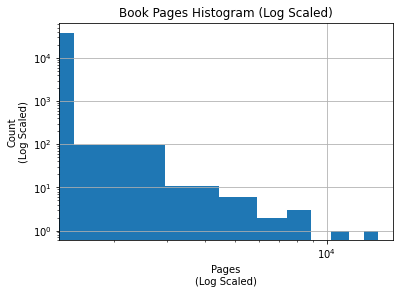

In [56]:
#Plot histogram of page distribution as a log-scale
genres.pages.hist()

plt.xlabel('Pages\n(Log Scaled)')
plt.ylabel('Count\n(Log Scaled)')
plt.title('Book Pages Histogram (Log Scaled)')
plt.xscale('log')
plt.yscale('log')
plt.show()

As we can see from the below bar plot, a majority of the books have between 227 and 403 pages. That means most books will take about 6.3 to 11.2 hours to read for the average reader.([source](https://swiftread.com/reading-time/226-pages), [source](https://capitalizemytitle.com/reading-time/404-pages/#:~:text=Answer%3A%20404%20pages%20will%20take,in%20less%20than%2015%20minutes.))

But there's still a sizeable amount of books with an extremely large number of pages.

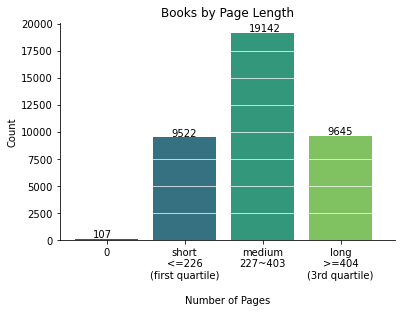

In [57]:
ax = sns.countplot(x=genres.length, palette='viridis')

ax.set_xticklabels(['0', 'short\n<=226\n(first quartile)', 'medium\n227~403', 'long\n>=404\n(3rd quartile)'])
ax.hlines(y=np.arange(0, 20000, 2500), xmin=0, xmax=3.5, color='white', linewidth=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Books by Page Length')
plt.xlabel('\nNumber of Pages')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.23, p.get_height()+100))

plt.show()

## Author Breakdown <a name='auth'></a>

Let's look at the authors now.

In [66]:
#Load the dataset
author_info = pd.read_csv('data/author_info.csv').rename(columns={'rating':'avg rating'})

In [67]:
author_info.head()

,author,nbooks,avg rating
0,Stephen King,146,4.039726
1,Agatha Christie,95,3.922526
2,Nora Roberts,94,4.092766
3,Cassandra Clare,90,4.264778
4,James Patterson,90,3.971667


In [60]:
#Load the relevant dataset
authors = pd.read_csv('data/authors_postsave.csv', index_col=0)

In [61]:
authors.head()

,authors,desc,edition,format,pages,rating,rating_count,review_count,title,missing_ed,missing_desc,length,quality,Fiction,Fantasy,Romance,Young Adult,Nonfiction,Historical,Historical Fiction,Contemporary,Classics,Mystery,Cultural,Paranormal,Science Fiction,Childrens,Literature,Other,first_author,fauthor_rating,fauthor_nbooks,authors_rating,authors_nbooks,nauthors,a1plus,a3plus,a5plus,a10plus,fmt_Audio,fmt_Digital,fmt_Hardcover,fmt_Missing,fmt_Other,fmt_Paperback
0,"['J.K. Rowling', 'Mary GrandPré']",There is a door at the end of a silent corrido...,0,Paperback,870.0,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,0.0,1.0,3.0,1.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,J.K. Rowling,4.244412,34,4.388873,20.000000,2,1,0,0,0,0,0,0,0,0,1
1,['Douglas Adams'],Seconds before the Earth is demolished to make...,0,Paperback,193.0,4.21,1155911,23919,The Hitchhiker's Guide to the Galaxy,1.0,1.0,1.0,1.0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,Douglas Adams,4.156957,23,4.156957,23.000000,1,0,0,0,0,0,0,0,0,0,1
2,['Shel Silverstein'],"""Once there was a tree...and she loved a littl...",0,Hardcover,64.0,4.37,789681,15694,The Giving Tree,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,Shel Silverstein,4.241818,11,4.241818,11.000000,1,0,0,0,0,0,0,1,0,0,0
3,['Dan Brown'],An ingenious code hidden in the works of Leona...,0,Paperback,481.0,3.81,1668594,43699,The Da Vinci Code,1.0,1.0,3.0,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,Dan Brown,3.818571,14,3.818571,14.000000,1,0,0,0,0,0,0,0,0,0,1
4,"['Lewis Carroll', 'John Tenniel', 'Martin Gard...",""" I can't explain myself, I'm afraid, sir,"" sa...",0,Paperback,239.0,4.07,411153,9166,Alice's Adventures in Wonderland & Through the...,1.0,1.0,2.0,1.0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,Lewis Carroll,4.085000,18,4.077143,9.666667,3,1,0,0,0,0,0,0,0,0,1


### Quality Authors <a name='authrated'></a>

Which authors tend to have the best ratings?

In [69]:
author_info.sort_values(by=['avg rating', 'nbooks'], ascending=False)

,author,nbooks,avg rating
19884,Jo-Anne McArthur,1,4.84
7545,George Patterson,1,4.81
8167,Gisele Maria Martin,1,4.81
14543,Shawna Roberts,1,4.81
14586,Sheila Orchiston,1,4.81
...,...,...,...
14059,Sam Munson,1,2.60
9659,Hope Mary Grace,1,2.59
17610,Tara Bray Smith,1,2.56
21457,Melissa Panarello,1,2.56


It looks like a lot of the highly rated authors have written only one book. It can't be determined whether that means they are good authors or a one-shot. As such, it could be better to take a look at authors who've written at least three or more books:

In [70]:
author_info[author_info['nbooks']>2].sort_values(by=['avg rating', 'nbooks'], ascending=False)

,author,nbooks,avg rating
429,Bill Watterson,14,4.693571
3527,Anna Othitis,3,4.693333
3352,Amit Ray,3,4.690000
3547,Harry Styles,3,4.680000
3818,Zayn Malik,3,4.680000
...,...,...,...
3792,Paul Rega,3,3.356667
3646,Aimee Bender,3,3.343333
2386,Djenar Maesa Ayu,4,3.277500
2237,Arthur Phillips,4,3.262500


Now we can see that Bill Watterson, who's written 14 books, is a well rated author. This is expected as he's the author of the Calvin and Hobbes comic strips!

In [83]:
authors[authors['authors'].str.contains('Bill Watterson')]

,authors,desc,edition,format,pages,rating,rating_count,review_count,title,missing_ed,missing_desc,length,quality,Fiction,Fantasy,Romance,Young Adult,Nonfiction,Historical,Historical Fiction,Contemporary,Classics,Mystery,Cultural,Paranormal,Science Fiction,Childrens,Literature,Other,first_author,fauthor_rating,fauthor_nbooks,authors_rating,authors_nbooks,nauthors,a1plus,a3plus,a5plus,a10plus,fmt_Audio,fmt_Digital,fmt_Hardcover,fmt_Missing,fmt_Other,fmt_Paperback
769,['Bill Watterson'],A collection of Calvin and Hobbes cartoons. Th...,0,Paperback,254.0,4.73,19341,466,The Authoritative Calvin and Hobbes: A Calvin ...,1.0,1.0,2.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Bill Watterson,4.693571,14,4.693571,14.0,1,0,0,0,0,0,0,0,0,0,1
893,['Bill Watterson'],"Many moons ago, the magic of Calvin and Hobbes...",0,Paperback,208.0,4.63,49529,377,The Calvin and Hobbes Tenth Anniversary Book,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Bill Watterson,4.693571,14,4.693571,14.0,1,0,0,0,0,0,0,0,0,0,1
1249,"['Bill Watterson', 'G.B. Trudeau']",This is the first collection of the popular co...,0,Paperback,127.0,4.60,129986,772,Calvin and Hobbes,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Bill Watterson,4.693571,14,4.646786,7.5,2,1,0,0,0,0,0,0,0,0,1
1360,['Bill Watterson'],Perhaps the most brilliant comic strip ever cr...,0,Paperback,256.0,4.63,104182,691,The Essential Calvin and Hobbes: A Calvin and ...,1.0,1.0,2.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Bill Watterson,4.693571,14,4.693571,14.0,1,0,0,0,0,0,0,0,0,0,1
2202,['Bill Watterson'],"They're back: Calvin, the six-year-old dirty t...",0,Paperback,255.0,4.73,18001,353,The Indispensable Calvin and Hobbes,1.0,1.0,2.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Bill Watterson,4.693571,14,4.693571,14.0,1,0,0,0,0,0,0,0,0,0,1
3378,['Bill Watterson'],"Zounds! Spaceman Spiff, Stupendous Man, the fe...",0,Paperback,176.0,4.69,21328,248,The Days Are Just Packed,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Bill Watterson,4.693571,14,4.693571,14.0,1,0,0,0,0,0,0,0,0,0,1
3795,['Bill Watterson'],When cartoonist Bill Watterson announced that ...,0,Paperback,176.0,4.76,24380,317,It's a Magical World,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Bill Watterson,4.693571,14,4.693571,14.0,1,0,0,0,0,0,0,0,0,0,1
5445,['Bill Watterson'],Calvin and Hobbes are back. The energetic six-...,0,Hardcover,127.0,4.72,12960,251,Attack of the Deranged Mutant Killer Monster S...,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Bill Watterson,4.693571,14,4.693571,14.0,1,0,0,0,0,0,0,1,0,0,0
6636,['Bill Watterson'],Find Sunday comic favorites in this classic Ca...,0,Paperback,128.0,4.67,19441,204,The Calvin and Hobbes Lazy Sunday Book,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Bill Watterson,4.693571,14,4.693571,14.0,1,0,0,0,0,0,0,0,0,0,1
7026,['Bill Watterson'],"In this collection, Calvin and his tiger-strip...",0,Paperback,128.0,4.72,12058,202,"Scientific Progress Goes ""Boink""",1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Bill Watterson,4.693571,14,4.693571,14.0,1,0,0,0,0,0,0,0,0,0,1


### The More, the Merrier? <a name='authmost'></a>

Some authors have written many works while others have not. Let's explore this list:

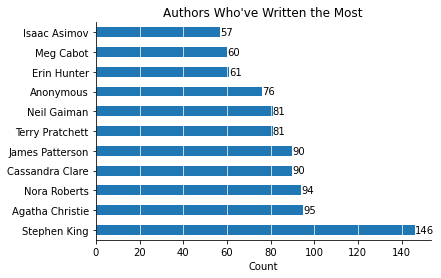

In [64]:
#Separate the top 10 authors with the most works
mostwriters = author_info.loc[:10].drop(columns=['rating'])

#Plot a horizontal bar plot
ax = mostwriters.nbooks.plot(kind='barh')

#Figure settings
ax.set_yticklabels(mostwriters.author)
ax.vlines(x=np.arange(0, 150, 20), ymin=-5, ymax=50, color='white', linewidth=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend().remove()

plt.title("Authors Who've Written the Most")
plt.ylabel('')
plt.xlabel('Count')

#Annotate the number of works
for p in ax.patches:
    ax.annotate('{}'.format(p.get_width()), (p.get_width(), p.get_y()+0.1))

plt.show()